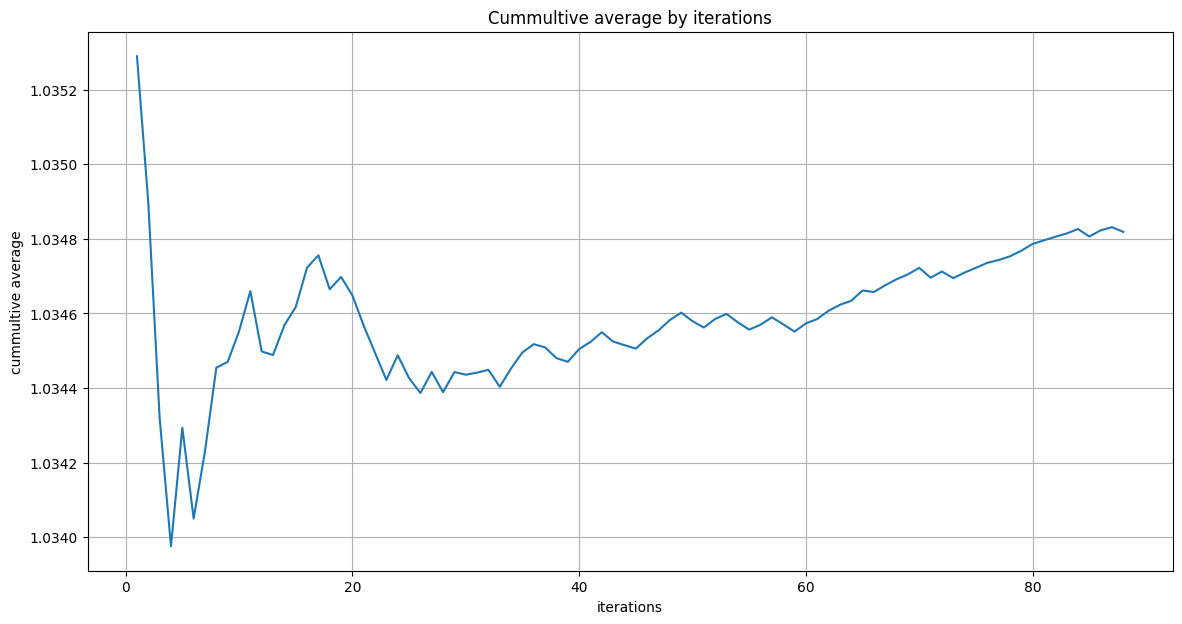

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


mean = [0, 0]
cov = [[1, 0], [0, 1]]

data = np.random.multivariate_normal(mean, cov, 10000)

centroid_norm = []

for i in range(88):
  kmeans = KMeans(n_clusters=3).fit(data)
  centers = kmeans.cluster_centers_
  tmp = 0
  for j in range(3):
    tmp += np.sqrt(centers[j][0] ** 2 + centers[j][1] ** 2)
  centroid_norm.append(tmp / 3)

cumultive_averages = []

tmp = 0
for i in range(1, 89):
  tmp += centroid_norm[i - 1]
  cumultive_averages.append(tmp / i)

plt.figure(figsize=(14, 7))
plt.plot(range(1,89), cumultive_averages)
plt.ylabel("cummultive average")
plt.xlabel("iterations")
plt.title("Cummultive average by iterations")
plt.grid()
plt.show()

Accuracy isn't reached in 50000 iterations


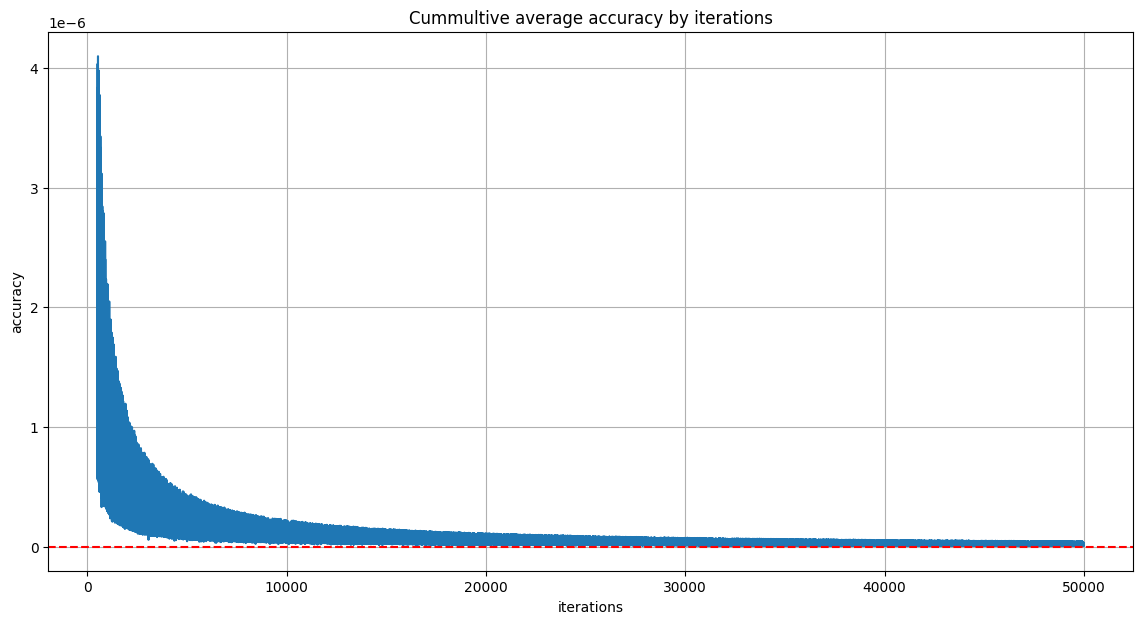

In [ ]:
centroid_norm2 = []

for i in range(50000):
  kmeans2 = KMeans(n_clusters=3).fit(data)
  centers2 = kmeans2.cluster_centers_
  tmp2 = 0
  for j in range(3):
    tmp2 += np.sqrt(centers2[j][0] ** 2 + centers2[j][1] ** 2)
  centroid_norm2.append(tmp2 / 3)

cumultive_averages2 = []

tmp = 0
for i in range(1, 50001):
  tmp += centroid_norm2[i - 1]
  cumultive_averages2.append(tmp / i)

accuracies = []
first_good = 0
for i in range(1, 50000):
  tmp = abs(cumultive_averages2[i] - cumultive_averages2[i-1])
  accuracies.append(tmp)
  if first_good == 0 and tmp < (10 ** -9):
    first_good = i
if first_good == 0:
  print("Accuracy isn't reached in 50000 iterations")
else:
  print(f"We need {first_good} iterations to achieve 9 digits accuracy")

plt.figure(figsize=(14, 7))
plt.plot(range(501,50000), accuracies[500:])
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("Cummultive average accuracy by iterations")
plt.axhline(y= 10 ** -9, color='r', linestyle='--')
plt.grid()
plt.show()

